# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This code is to complete the first project in Data Analysis Nano Program:
    No-show appointments (original source on [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments))

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are
included in each row where some of them are explained as follows,

   * **PatientId** shows the identification of a patient;
   * **AppointmentID** shows the dentification of each appointment
   * **Gender** Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man;
   * **ScheduledDay** tells us on what day the patient set up their appointment;
   * **AppointmentDay** indicates the appointment day that the patient scheduled;
   * **Age** How old is the patient;
   * **Neighborhood** indicates the location of the hospital;
   * **Scholarship** indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia);
   * **Hipertension** indicates whether a patient has been diagnosed with hypertension or high blood pressure. A value of **1** typically represents that the patient has hypertension, while a value of **0** indicates the absence of hypertension;
   * **Diabetes** represents whether a patient has been diagnosed with diabetes. A value of **1** usually indicates that the patient has diabetes, while a value of **0** signifies the absence of diabetes;
   * **Alcoholism** indicates whether a patient has been diagnosed with alcoholism or alcohol-related issues. A value of **1** typically represents that the patient has alcoholism, while a value of **0** indicates the absence of alcoholism;
   * **Handicap** represents the level of handicap or disability a patient may have. It is often represented by integer values ranging from **0** to **4**, where **0** indicates no handicap and higher values indicate increasing levels of handicap;
   * **SMS_received** indicates whether or not a patient received an SMS reminder for their appointment. In the context of the dataset, a value of **1** typically represents that the patient received an SMS reminder, while a value of **0** indicates that the patient did not receive an SMS reminder; and,
   * **No-show** indicates **'No'** if the patient showed up to their appointment, and **'Yes'** if they did not show up.

### Question(s) for Analysis

1. How is the patients' age distributed?
2. How is the age_group distributed among the patients in the Brazilian welfare system?
3. What is the no-show rate of patients within appointment month, based on whether they received an SMS reminder or not?
4. Does the severity of the handicap affect the attendance rate of patients across different age groups?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

<a id='wrangling'></a>
## Data Wrangling
### General Properties

#### To obtain the database location

In [2]:
%pwd

'/workspace'

In [3]:
%ls

Database_Ncis_and_Census_data/  Investigate_a_Dataset.html
Database_No_show_appointments/  Investigate_a_Dataset.ipynb
Database_TMDb_movie_data/


In [4]:
%ls Database_No_show_appointments

noshowappointments-kagglev2-may-2016.csv


#### Load the database

In [5]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.
# set_option in case of too many columns
pd.set_option('display.max_columns', None)

In [6]:
# list the data location
data_dir  = 'Database_No_show_appointments/'
data_name = 'noshowappointments-kagglev2-may-2016.csv'

In [7]:
# load the data
df = pd.read_csv(data_dir+data_name)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# look at the information of the source data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
# check the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

#### Check all the unique values in each column

In [10]:
for col in df.columns:
    print(col, ',', df[col].unique())

PatientId , [2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13]
AppointmentID , [5642903 5642503 5642549 ... 5630692 5630323 5629448]
Gender , ['F' 'M']
ScheduledDay , ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']
AppointmentDay , ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:

#### Although there is no null value in the database, there is an invalid age "-1"

In [11]:
# check how many rows that have invalid age
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [12]:
df[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


#### Since there is only one patient's age missing and there are 2215 rows from **'ROMÃO'**. It is not expected to have a significant effect on the results when dropping this row.

In [13]:
df[df['Neighbourhood'] == 'ROMÃO'].count()

PatientId         2215
AppointmentID     2215
Gender            2215
ScheduledDay      2215
AppointmentDay    2215
Age               2215
Neighbourhood     2215
Scholarship       2215
Hipertension      2215
Diabetes          2215
Alcoholism        2215
Handcap           2215
SMS_received      2215
No-show           2215
dtype: int64

#### Double check any null, duplicates and general statistics

In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


### Data Cleaning 

#### Drop row with an invalid age value

In [17]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# dropping the row
df.drop(df[df['Age'] == -1].index, axis=0, inplace=True)

In [18]:
# check if the invalid row is dropped
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110526.0,1.474934e+14,2.560943e+14,3.921784e+04,4.172536e+12,3.173184e+13,9.438963e+13,9.999816e+14
AppointmentID,110526.0,5.675304e+06,7.129544e+04,5.030230e+06,5.640285e+06,5.680572e+06,5.725523e+06,5.790484e+06
Age,110526.0,3.708922e+01,2.311003e+01,0.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110526.0,9.826647e-02,2.976760e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110526.0,1.972477e-01,3.979227e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110526.0,7.186544e-02,2.582662e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110526.0,3.040009e-02,1.716863e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110526.0,2.224816e-02,1.615434e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110526.0,3.210285e-01,4.668738e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


#### Format the column names to be lowercase and underscored, so that the columns can be called as attributes

In [19]:
# rename the columns with lower_case and under_scores
rename_values = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 'appointment_day',
                 'age', 'neighbourhood', 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 
                 'handcap', 'sms_received', 'no_show']
rename_dict = dict(zip(df.columns, rename_values))

In [20]:
df.rename(columns=rename_dict, inplace=True)

In [21]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Format the no_show column to lowercases

In [22]:
df.no_show = df.no_show.apply(lambda x: x.lower()).astype('category')

In [23]:
df.no_show.value_counts()

no     88207
yes    22319
Name: no_show, dtype: int64

#### Format '0' and '1' in columns from scholarship to sms_received to 'no' and 'yes' for a better categorisation

In [24]:
for col in ['scholarship','hipertension','diabetes','alcoholism','sms_received']:
    df[col] = df[col].apply(lambda x: 'yes' if x else 'no').astype('category')
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,no,yes,no,no,0,no,no
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,no,no,no,no,0,no,no
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,no,no,no,no,0,no,no
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,no,no,no,no,0,no,no
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,no,yes,yes,no,0,no,no


In [25]:
df.scholarship.value_counts()

no     99665
yes    10861
Name: scholarship, dtype: int64

#### Format column 'gender' and 'handcap' to category

In [26]:
df.gender = df.gender.astype('category')
df.handcap = df.handcap.astype('category')

#### By formatting the data, the database size is reduced

In [27]:
# check the dataframe again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   patient_id       110526 non-null  float64 
 1   appointment_id   110526 non-null  int64   
 2   gender           110526 non-null  category
 3   scheduled_day    110526 non-null  object  
 4   appointment_day  110526 non-null  object  
 5   age              110526 non-null  int64   
 6   neighbourhood    110526 non-null  object  
 7   scholarship      110526 non-null  category
 8   hipertension     110526 non-null  category
 9   diabetes         110526 non-null  category
 10  alcoholism       110526 non-null  category
 11  handcap          110526 non-null  category
 12  sms_received     110526 non-null  category
 13  no_show          110526 non-null  category
dtypes: category(8), float64(1), int64(2), object(3)
memory usage: 6.7+ MB


#### Format the schedule_day and appointment_day into datetime format

In [28]:
df.scheduled_day = pd.to_datetime(df.scheduled_day, format='%Y-%m-%d')

In [29]:
df.appointment_day = pd.to_datetime(df.appointment_day, format='%Y-%m-%d')
df.appointment_day

0        2016-04-29 00:00:00+00:00
1        2016-04-29 00:00:00+00:00
2        2016-04-29 00:00:00+00:00
3        2016-04-29 00:00:00+00:00
4        2016-04-29 00:00:00+00:00
                    ...           
110522   2016-06-07 00:00:00+00:00
110523   2016-06-07 00:00:00+00:00
110524   2016-06-07 00:00:00+00:00
110525   2016-06-07 00:00:00+00:00
110526   2016-06-07 00:00:00+00:00
Name: appointment_day, Length: 110526, dtype: datetime64[ns, UTC]

To group the data by year or month, part the datetime into year_appointment,  month_appointment, and day_appointment where **year_appointment**, **month_appointment**, **day_appointment** are the year, month, and day of the column **appointment_day**, respectively. 

In [30]:
df['year_appointment'] = df.appointment_day.dt.year.astype('category')
df['month_appointment'] = df.appointment_day.dt.month.astype('category')
df['day_appointment'] = df.appointment_day.dt.day.astype('category')
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,year_appointment,month_appointment,day_appointment
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,no,yes,no,no,0,no,no,2016,4,29
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,no,no,no,no,0,no,no,2016,4,29
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,no,no,no,no,0,no,no,2016,4,29
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,no,no,no,no,0,no,no,2016,4,29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,no,yes,yes,no,0,no,no,2016,4,29


Now, check if there is any null value again.

In [31]:
df.isnull().sum()

patient_id           0
appointment_id       0
gender               0
scheduled_day        0
appointment_day      0
age                  0
neighbourhood        0
scholarship          0
hipertension         0
diabetes             0
alcoholism           0
handcap              0
sms_received         0
no_show              0
year_appointment     0
month_appointment    0
day_appointment      0
dtype: int64

In [32]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
patient_id,110526.0,1.474934e+14,2.560943e+14,3.921784e+04,4.172536e+12,3.173184e+13,9.438963e+13,9.999816e+14
appointment_id,110526.0,5.675304e+06,7.129544e+04,5.030230e+06,5.640285e+06,5.680572e+06,5.725523e+06,5.790484e+06
age,110526.0,3.708922e+01,2.311003e+01,0.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02


#### Reduce the size of numeric columns

In [33]:
for col in df.describe().columns:
    df[col] = df[col].apply(pd.to_numeric, downcast="integer")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   patient_id         110526 non-null  float64            
 1   appointment_id     110526 non-null  int64              
 2   gender             110526 non-null  category           
 3   scheduled_day      110526 non-null  datetime64[ns, UTC]
 4   appointment_day    110526 non-null  datetime64[ns, UTC]
 5   age                110526 non-null  int64              
 6   neighbourhood      110526 non-null  object             
 7   scholarship        110526 non-null  category           
 8   hipertension       110526 non-null  category           
 9   diabetes           110526 non-null  category           
 10  alcoholism         110526 non-null  category           
 11  handcap            110526 non-null  category           
 12  sms_received       110526 non-

#### Double-check the database

In [35]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,year_appointment,month_appointment,day_appointment
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,no,yes,no,no,0,no,no,2016,4,29
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,no,no,no,no,0,no,no,2016,4,29
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,no,no,no,no,0,no,no,2016,4,29
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,no,no,no,no,0,no,no,2016,4,29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,no,yes,yes,no,0,no,no,2016,4,29


In [36]:
df.tail()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,year_appointment,month_appointment,day_appointment
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,no,no,no,no,0,yes,no,2016,6,7
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,no,no,no,no,0,yes,no,2016,6,7
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,no,no,no,no,0,yes,no,2016,6,7
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,no,no,no,no,0,yes,no,2016,6,7
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,no,no,no,no,0,yes,no,2016,6,7


In [37]:
df.isnull().sum()

patient_id           0
appointment_id       0
gender               0
scheduled_day        0
appointment_day      0
age                  0
neighbourhood        0
scholarship          0
hipertension         0
diabetes             0
alcoholism           0
handcap              0
sms_received         0
no_show              0
year_appointment     0
month_appointment    0
day_appointment      0
dtype: int64

#### Group the age based on percentile. Here I used 10%, 25%, 50%, 75%, 90% and 95% to be the quantile marks

In [38]:
tmp_tile = df.age.quantile([.1,.25,.50,.75,.90,.95]).values
def group_age(x_age):   
    if x_age < tmp_tile[0]:
        out_age = f'{0} - {int(tmp_tile[0])}'
    elif x_age > tmp_tile[-1]:
        out_age = f'>{int(tmp_tile[-1])}'
    else:
        for i_age, tmp_age in enumerate(tmp_tile[1:]):
            if (x_age >= tmp_tile[i_age]) and (x_age < tmp_age+0.5):
                out_age = f'{int(tmp_tile[i_age])} - {int(tmp_age)}'
    return out_age

In [39]:
df['age_group'] = df.age.apply(group_age).astype('category')
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,year_appointment,month_appointment,day_appointment,age_group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,no,yes,no,no,0,no,no,2016,4,29,55 - 68
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,no,no,no,no,0,no,no,2016,4,29,55 - 68
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,no,no,no,no,0,no,no,2016,4,29,55 - 68
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,no,no,no,no,0,no,no,2016,4,29,5 - 18
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,no,yes,yes,no,0,no,no,2016,4,29,55 - 68


In [40]:
df.year_appointment.value_counts()

2016    110526
Name: year_appointment, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   patient_id         110526 non-null  float64            
 1   appointment_id     110526 non-null  int64              
 2   gender             110526 non-null  category           
 3   scheduled_day      110526 non-null  datetime64[ns, UTC]
 4   appointment_day    110526 non-null  datetime64[ns, UTC]
 5   age                110526 non-null  int64              
 6   neighbourhood      110526 non-null  object             
 7   scholarship        110526 non-null  category           
 8   hipertension       110526 non-null  category           
 9   diabetes           110526 non-null  category           
 10  alcoholism         110526 non-null  category           
 11  handcap            110526 non-null  category           
 12  sms_received       110526 non-

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 - How is the patients' age distributed?

In [42]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# setup binstep and the histo bins
bins_step = 10
bins_q1 = np.arange(df.age.min(),df.age.max()+bins_step,bins_step)

Text(0, 0.5, "number of patients' appointments")

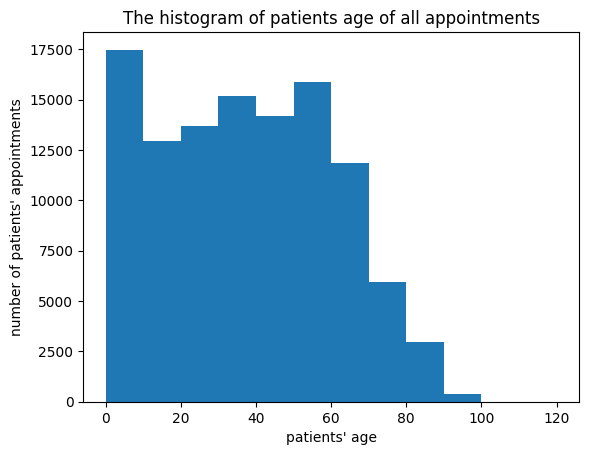

In [43]:
# plot the histo of patients' ages using the bins
axe = df.age.plot(kind='hist',bins=bins_q1, title='The histogram of patients'' age of all appointments')
axe.set_xlabel('patients\' age')
axe.set_ylabel('number of patients\' appointments')

### The histogram above equally spaced the ages in an span of 10. As per the histogram above, the patients who made appointments are mainly at an age below 70, where each of those age groups have made more than 10,000 appointments. 

### Research Question 2 - How is the age group distributed among the patients in the Brazilian welfare system?

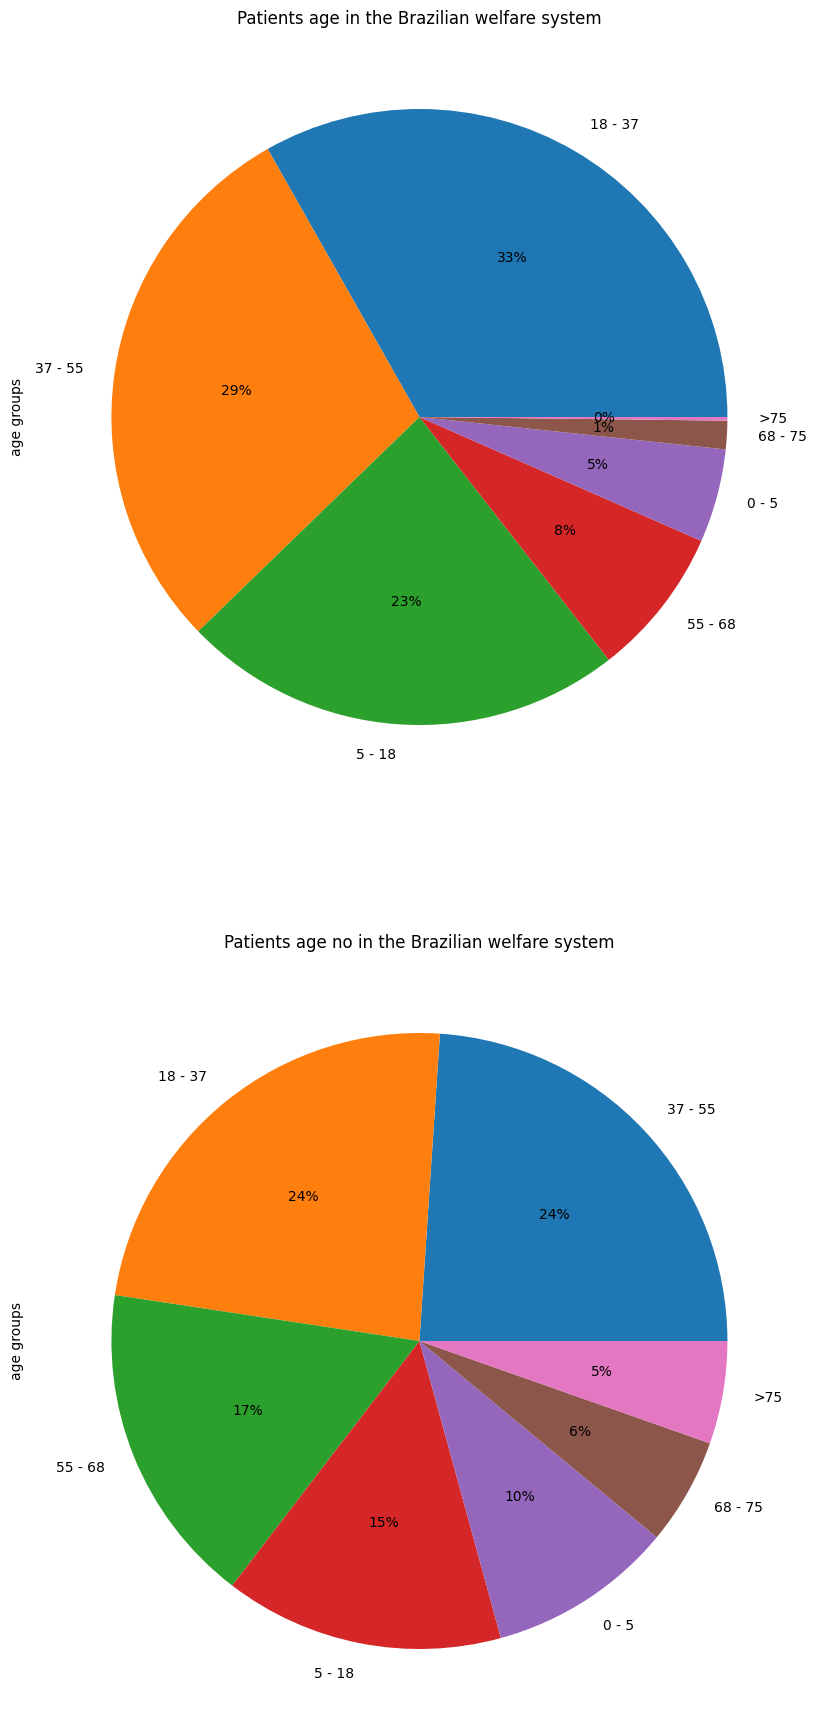

In [44]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# separate the patients by whether they are in the Brazilian welfare system.
fig, axes = plt.subplots(nrows=2,ncols=1)
df_q2_yes = df.query('scholarship == "yes"').age_group.value_counts(normalize=True).mul(100).round(2)
df_q2_no  = df.query('scholarship == "no"').age_group.value_counts(normalize=True).mul(100).round(2)
# plot the patients age group by whether they are in the Brazilian welfare system. 
df_q2_yes.plot(kind='pie',figsize=[11,22],ylabel='age groups',autopct='%1.0f%%',title='Patients'' age in the Brazilian welfare system', ax=axes[0])
df_q2_no.plot(kind='pie',figsize=[11,22],ylabel='age groups',autopct='%1.0f%%',title='Patients'' age no in the Brazilian welfare system', ax=axes[1])
plt.show()

### From the two pie charts, it is noted that the proportion of appointments made by the patients in the Brazilian welfare system over the age of 68 is nearly 1% only , whilst this proportion of appointments is considerably 11% among the patients without the welfare. No matter whether in the welfare system or not, patients at the age between 18 and 55 relate to the majority of the appointments. 

### Research Question 3 - What is the no-show rate of patients within appointment month, based on whether they received an SMS reminder or not?

In [45]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

# group the no-show rate by the appointment month and whether the patient were reminded by sms.
df_q3 = df.groupby(by=['month_appointment','sms_received']).no_show.value_counts(normalize=True).mul(100).round(2).unstack()['yes']

<AxesSubplot: title={'center': 'No-show rate vs. months based on whether received sms'}, xlabel='month of the appointments', ylabel='no-show percentage (%)'>

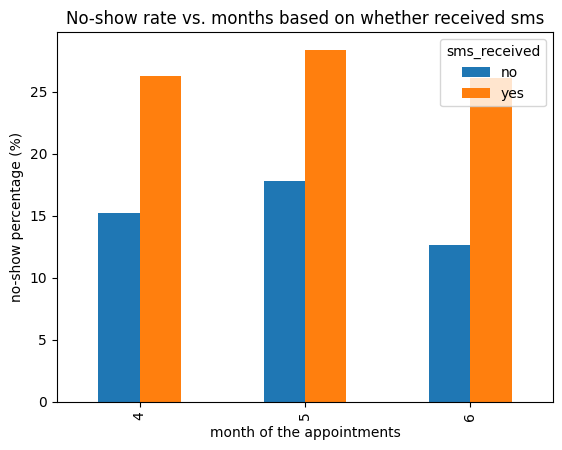

In [46]:
df_q3.unstack().plot(kind='bar', xlabel='month of the appointments', ylabel='no-show percentage (%)', title='No-show rate vs. months based on whether received sms')

### The appointments of the database are focused in April, May and June. The no-show rate barely varies among these three months. However, it is observed that the no-show rate was increased by around 10% when patients received an sms reminder.

### Research Question 4 - Does the severity of the handicap affect the attendance rate of patients across different age groups?

In [47]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

# group the no-show rate by the handcap level and age group
df_q4_count = df.groupby(by=['handcap','age_group']).no_show.value_counts(normalize=True).mul(100).round(2).unstack()['yes']

<AxesSubplot: title={'center': 'No-show rate vs. age groups and handcap levels'}, xlabel='handcap level', ylabel='no-show percentage (%)'>

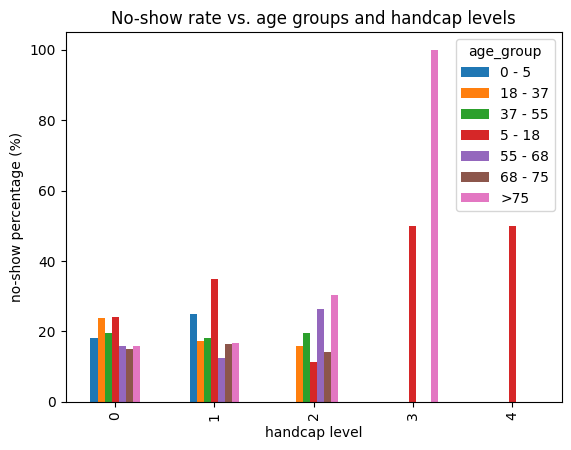

In [48]:
df_q4_count.unstack().plot(kind='bar', xlabel='handcap level', ylabel='no-show percentage (%)', title='No-show rate vs. age groups and handcap levels')

In [49]:
df.groupby('handcap').age_group.value_counts()

handcap  age_group
0        18 - 37      26806
         37 - 55      26447
         55 - 68      17328
         5 - 18       16912
         0 - 5        10232
         68 - 75       5513
         >75           5047
1        37 - 55        531
         55 - 68        436
         18 - 37        359
         >75            298
         68 - 75        226
         5 - 18         184
         0 - 5            8
2        >75             46
         18 - 37         38
         37 - 55         36
         5 - 18          35
         55 - 68         19
         68 - 75          7
         0 - 5            2
3        55 - 68          5
         5 - 18           4
         68 - 75          3
         >75              1
         0 - 5            0
         18 - 37          0
         37 - 55          0
4        5 - 18           2
         18 - 37          1
         0 - 5            0
         37 - 55          0
         55 - 68          0
         68 - 75          0
         >75              0
N

### As shown above, the handcap level between 0 and 2 does not show an observable effect on the no-show rate across different age groups, while once the handcap level rises to 3 and 4, the no-show rate increased dramatically especially for the patients over 75. However, there is no enough data for the handcap level of 3 and 4. The observation remain discussible.

<a id='conclusions'></a>
## Conclusions

In this analysis, this patients' appointments was investigated based on the patients' age, member or not of the Brazilian welfare system, appointment months, handcap levels, no-show rate, and whether they have received an sms appointment reminder. Three research questions were discussed as follows,

1. How is the patients' age distributed?

    The histogram above equally spaced the ages in an span of 10. As per the histogram above, the patients who made appointments are mainly at an age below 70, where each of those age groups have made more than 10,000 appointments.

2. How is the age group distributed among the patients in and not in the Brazilian welfare system?

    From the two pie charts, it is noted that the proportion of appointments made by the patients in the Brazilian welfare system over the age of 68 is nearly 1% only , whilst this proportion of appointments is considerably 11% among the patients without the welfare. No matter whether in the welfare system or not, patients at the age between 18 and 55 relate to the majority of the appointments.
      

3. What is the no-show rate of patients within appointment month, based on whether they received an SMS reminder or not?

    The appointments of the database is focused in April, May and June. The no-show rate barely varies among these three months. However, it is observed that the no-show rate is increased by around 10% when patients receive an sms reminder.
       

4. Does the severity of the handicap affect the no-show rate of patients across different age groups?

    As shown above, the handcap level between 0 and 2 does not show an observable effect on the no-show rate across different age groups, while once the handcap level rises to 3 and 4, the no-show rate increases dramatically especially for the patients over 75. However, there is no enough data for the handcap level of 3 and 4. The observation remains discussible.

## Limitation

It is observed that few appointments data are from the handcap levels of 3 and 4, some conclusions on the corresponding dimensions (e.g., the no-show rate related to handicap levels) still remain discussible and require a larger datasize.

## Futurework

In the current database, the column "neighbourhood" covers totally 81 hospital location names without a clear statistical clue. This makes the observation on the appointments data related to hospital locations barely achievable. Extra data columns (e.g., distance between residential and hospital locations, hospital size, etc) can be added into the database to complement the information.


## Submitting your Project 

In [50]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 643095 bytes to Investigate_a_Dataset.html
